### Segment Test

### 데이터셋 로드

In [ ]:
# Seg

from roboflow import Roboflow
rf = Roboflow(api_key="ElIox72mujQ8VOYKZdPN")
project = rf.workspace("roboflow-universe-projects").project("fire-and-smoke-segmentation")
version = project.version(6)
dataset = version.download("yolov8")
                

### GPU 설정

In [1]:
import torch
print(torch.cuda.is_available())  # True면 GPU 사용 가능
print(torch.cuda.get_device_name(0))  # 그래픽카드 이름

True
NVIDIA GeForce RTX 3070 Ti Laptop GPU


### 모델 학습

### train

In [2]:
from ultralytics import YOLO

# 1. 모델 로드
model = YOLO("yolov8n-seg.pt")

# 2. 학습 시작
model.train(
    data="Fire-and-Smoke-Segmentation-6/data.yaml",
    epochs=100,
    patience=10,
    imgsz=640,
    batch=16, # 메모리에 따라 조절 (CPU=4~8, GPU=16~32)
    project="runs", # 결과 저장 경로
    name="firesmoke_seg_train", # 실험 이름
    resume=False # 중단된 학습 이어서 할 건지 여부
)

100%|██████████| 6.74M/6.74M [00:00<00:00, 75.5MB/s]

New https://pypi.org/project/ultralytics/8.3.152 available  Update with 'pip install -U ultralytics'


Ultralytics 8.3.146  Python-3.12.9 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3070 Ti Laptop GPU, 8192MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Fire-and-Smoke-Segmentation-6/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=firesmoke_seg_train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience

train: Scanning C:\Users\main\workspace\vision\project\Fire-and-Smoke-Segmentation-6\train\labels... 7050 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7050/7050 [00:23<00:00, 294.66it/s]


train: New cache created: C:\Users\main\workspace\vision\project\Fire-and-Smoke-Segmentation-6\train\labels.cache
val: Fast image access  (ping: 0.10.0 ms, read: 2.71.8 MB/s, size: 37.8 KB)


val: Scanning C:\Users\main\workspace\vision\project\Fire-and-Smoke-Segmentation-6\valid\labels... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<00:00, 177.17it/s]

val: New cache created: C:\Users\main\workspace\vision\project\Fire-and-Smoke-Segmentation-6\valid\labels.cache


Plotting labels to runs\firesmoke_seg_train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\firesmoke_seg_train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.75G      1.152      2.534      2.103        1.3         50        640: 100%|██████████| 441/441 [01:14<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.00it/s]

                   all         40         97      0.797      0.553      0.632      0.441      0.807      0.561      0.615      0.391



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.33G      1.015      2.005      1.256      1.172         56        640: 100%|██████████| 441/441 [01:15<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.69it/s]

                   all         40         97      0.765      0.695      0.719      0.469      0.837      0.629      0.726      0.439



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.33G      1.027      1.956        1.1      1.178         34        640: 100%|██████████| 441/441 [02:21<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]

                   all         40         97       0.58      0.653      0.577      0.386      0.718      0.578      0.595      0.359



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.34G      1.042      1.944     0.9882      1.186         33        640: 100%|██████████| 441/441 [02:22<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.67it/s]

                   all         40         97      0.684      0.645      0.685      0.476       0.92      0.562      0.677      0.446



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.35G     0.9778      1.824     0.8558      1.151         60        640: 100%|██████████| 441/441 [02:19<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.73it/s]

                   all         40         97      0.828      0.632      0.713      0.485      0.839      0.641      0.681      0.446



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.35G     0.9211      1.737     0.7697      1.115         36        640: 100%|██████████| 441/441 [02:19<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.76it/s]

                   all         40         97      0.816      0.625      0.692       0.48      0.851      0.636      0.719      0.446



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.35G      0.884       1.66     0.7128      1.094         27        640: 100%|██████████| 441/441 [02:21<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]

                   all         40         97      0.863      0.693      0.729      0.491      0.879      0.675      0.734      0.484



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.35G     0.8553      1.624     0.6763      1.083         49        640: 100%|██████████| 441/441 [02:22<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         40         97      0.882      0.768      0.771      0.543      0.894      0.768      0.775      0.486



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.35G     0.8264      1.572     0.6403      1.063         36        640: 100%|██████████| 441/441 [02:19<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.67it/s]

                   all         40         97      0.854      0.663      0.708      0.507      0.863      0.679      0.695      0.452



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.35G     0.8114      1.535     0.6098      1.055         35        640: 100%|██████████| 441/441 [02:24<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.39it/s]

                   all         40         97      0.801      0.722      0.732      0.504      0.786      0.709      0.709      0.451



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.35G      0.781      1.496     0.5885      1.039         46        640: 100%|██████████| 441/441 [02:25<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]

                   all         40         97      0.854      0.699       0.72      0.512      0.876      0.703      0.756      0.472



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.35G     0.7663      1.476     0.5694       1.03         44        640: 100%|██████████| 441/441 [02:21<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.79it/s]

                   all         40         97      0.863      0.671      0.711      0.506      0.932      0.653      0.732      0.458



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.35G     0.7518      1.439     0.5571      1.024         56        640: 100%|██████████| 441/441 [02:20<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.69it/s]

                   all         40         97      0.861      0.682      0.714      0.512       0.87      0.691      0.716      0.475



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.35G     0.7331      1.414     0.5381      1.015         51        640: 100%|██████████| 441/441 [02:20<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all         40         97      0.784      0.687      0.677      0.479       0.81      0.671      0.669       0.45



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.35G     0.7234      1.384     0.5272      1.013         50        640: 100%|██████████| 441/441 [02:21<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]

                   all         40         97      0.819      0.706      0.733      0.526      0.844      0.726      0.765      0.485



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.35G     0.7133      1.371     0.5142      1.005         35        640: 100%|██████████| 441/441 [02:23<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.67it/s]

                   all         40         97      0.932      0.647      0.718       0.49      0.933      0.658      0.719      0.478



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.35G     0.7004      1.356     0.5081     0.9999         44        640: 100%|██████████| 441/441 [02:23<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]

                   all         40         97      0.895       0.68      0.745      0.519      0.865      0.663      0.707      0.459



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.35G     0.6985      1.334     0.5013     0.9994         38        640: 100%|██████████| 441/441 [02:27<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.33it/s]

                   all         40         97      0.888      0.665      0.726      0.493      0.844      0.709      0.746      0.453
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 8, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



18 epochs completed in 0.680 hours.
Optimizer stripped from runs\firesmoke_seg_train\weights\last.pt, 6.8MB
Optimizer stripped from runs\firesmoke_seg_train\weights\best.pt, 6.8MB

Validating runs\firesmoke_seg_train\weights\best.pt...
Ultralytics 8.3.146  Python-3.12.9 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3070 Ti Laptop GPU, 8192MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,258,454 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validati

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:00<00:00,  1.39it/s]

WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  2.00it/s]


                   all         40         97      0.882      0.768      0.771      0.543      0.894      0.768      0.775      0.486
                  fire         40         58      0.961      0.844      0.857      0.678          1       0.87      0.899      0.642
                 smoke         28         39      0.803      0.692      0.685      0.409      0.788      0.667      0.651       0.33
Speed: 0.3ms preprocess, 3.9ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs\firesmoke_seg_train


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001B98BCE9670>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.0

### 결과 시각화

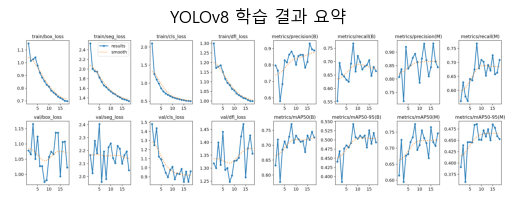

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib

# 한글 폰트 설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # Windows는 맑은 고딕
# matplotlib.rcParams['font.family'] = 'AppleGothic'  # macOS일 경우

# 마이너스 부호 깨짐 방지
matplotlib.rcParams['axes.unicode_minus'] = False

img = Image.open("runs/firesmoke_seg_train/results.png")
plt.imshow(img)
plt.axis("off")
plt.title("YOLOv8 학습 결과 요약")
plt.show()


### tuned

In [2]:
from ultralytics import YOLO

# 1. 모델 로드
model = YOLO("yolov8n-seg.pt")

# 2. 학습 시작
model.train(
    data="Fire-and-Smoke-Segmentation-6/data.yaml",
    epochs=120,
    patience=15,
    imgsz=768,
    batch=16, # 메모리에 따라 조절 (CPU=4~8, GPU=16~32)
    lr0=0.001,
    optimizer='AdamW',
    dropout=0.1,
    warmup_epochs=3,
    weight_decay=0.0005, # L2 정규화
    device=0,
    project="runs", # 결과 저장 경로
    name="firesmoke_seg_tuned1", # 실험 이름
    resume=False # 중단된 학습 이어서 할 건지 여부
)

New https://pypi.org/project/ultralytics/8.3.153 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.146  Python-3.12.9 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3070 Ti Laptop GPU, 8192MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Fire-and-Smoke-Segmentation-6/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.1, dynamic=False, embed=None, epochs=120, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=768, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=firesmoke_se

train: Scanning C:\Users\main\workspace\vision\project\Fire-and-Smoke-Segmentation-6\train\labels.cache... 7050 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7050/7050 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.20.1 ms, read: 77.543.2 MB/s, size: 37.8 KB)


val: Scanning C:\Users\main\workspace\vision\project\Fire-and-Smoke-Segmentation-6\valid\labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]


Plotting labels to runs\firesmoke_seg_tuned12\labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 768 train, 768 val
Using 8 dataloader workers
Logging results to runs\firesmoke_seg_tuned12
Starting training for 120 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/120      3.85G      1.164      2.384      1.408       1.35         50        768: 100%|██████████| 441/441 [01:37<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]

                   all         40         97       0.69      0.602      0.631      0.364      0.379       0.34      0.331      0.144



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/120      3.54G       1.03      2.002     0.9479      1.242         56        768: 100%|██████████| 441/441 [01:49<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         40         97      0.746      0.644      0.692       0.41        0.7      0.601      0.678      0.303



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/120      3.62G      1.003      1.892     0.8596      1.222         34        768: 100%|██████████| 441/441 [02:30<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         40         97      0.692      0.637      0.659      0.414      0.699      0.641      0.677      0.356



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/120      3.64G     0.9535      1.811     0.7833      1.187         33        768: 100%|██████████| 441/441 [02:28<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

                   all         40         97      0.789      0.672      0.726      0.499      0.757      0.647        0.7      0.466



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/120       3.7G     0.9115       1.73     0.7219      1.161         60        768: 100%|██████████| 441/441 [02:29<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         40         97      0.756      0.575      0.582      0.416      0.766      0.583      0.606      0.404



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/120      3.57G     0.8593      1.668     0.6621      1.125         36        768: 100%|██████████| 441/441 [02:29<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         40         97      0.825      0.621      0.687      0.507      0.901      0.579      0.674      0.448



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/120      3.56G     0.8376       1.62     0.6376      1.111         27        768: 100%|██████████| 441/441 [02:26<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.40it/s]

                   all         40         97      0.857       0.63      0.719      0.525      0.868      0.639      0.729      0.484



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/120       3.6G     0.8134      1.598     0.6162      1.099         49        768: 100%|██████████| 441/441 [02:26<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.28it/s]

                   all         40         97      0.769      0.649      0.671      0.479      0.779      0.657      0.686      0.443



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/120       3.6G     0.8011      1.555     0.6028      1.088         36        768: 100%|██████████| 441/441 [02:26<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all         40         97      0.799      0.623      0.696      0.492      0.783      0.666      0.707      0.454



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/120      3.54G     0.7717       1.52     0.5714      1.072         35        768: 100%|██████████| 441/441 [02:26<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         40         97      0.757      0.675       0.67      0.479      0.758      0.665      0.683      0.442



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/120      3.48G     0.7572      1.482     0.5541      1.061         46        768: 100%|██████████| 441/441 [02:28<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         97      0.856        0.6      0.724      0.511      0.754      0.647      0.699      0.455



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/120      3.59G     0.7388      1.465     0.5379      1.052         44        768: 100%|██████████| 441/441 [02:27<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

                   all         40         97      0.837      0.685      0.736      0.514      0.832      0.681      0.736      0.464



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/120      3.59G     0.7391      1.446     0.5342      1.049         56        768: 100%|██████████| 441/441 [02:27<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

                   all         40         97      0.726      0.714      0.713      0.494      0.857      0.611      0.721      0.476



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/120      3.63G     0.7155      1.409     0.5102      1.038         51        768: 100%|██████████| 441/441 [02:28<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         97      0.782      0.633      0.641      0.447      0.743      0.604      0.616      0.402



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/120      3.57G      0.709      1.392     0.5092      1.033         50        768: 100%|██████████| 441/441 [02:27<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         97      0.856       0.62      0.658      0.459      0.873      0.638      0.678      0.431



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/120      3.55G      0.705      1.384     0.5038      1.032         35        768: 100%|██████████| 441/441 [02:27<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.48it/s]

                   all         40         97      0.853        0.7      0.718      0.486      0.831      0.683      0.697      0.449



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/120      3.62G     0.6959      1.367     0.5003       1.03         44        768: 100%|██████████| 441/441 [02:26<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.41it/s]

                   all         40         97      0.854        0.7      0.757      0.536      0.847      0.697      0.727      0.479



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/120      3.63G     0.6872      1.339     0.4879      1.025         38        768: 100%|██████████| 441/441 [02:26<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         40         97       0.91      0.693      0.737      0.522      0.901      0.689      0.733      0.478



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/120      3.54G     0.6753      1.335     0.4728      1.015         42        768: 100%|██████████| 441/441 [02:29<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         97       0.83      0.677      0.747      0.521       0.84      0.686      0.756      0.461



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/120      3.63G     0.6714      1.316     0.4728      1.016         48        768: 100%|██████████| 441/441 [02:30<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40         97      0.884      0.674      0.755      0.522      0.874       0.67      0.741      0.469



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/120      3.57G     0.6648      1.303     0.4693      1.015         44        768: 100%|██████████| 441/441 [02:26<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         40         97      0.784        0.7      0.729      0.526        0.8      0.717      0.742      0.468



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/120      3.58G     0.6657      1.304     0.4707      1.011         51        768: 100%|██████████| 441/441 [02:27<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

                   all         40         97      0.823      0.709      0.743      0.531      0.842      0.733      0.777      0.499



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/120      3.56G     0.6651      1.303     0.4692      1.013         46        768: 100%|██████████| 441/441 [02:26<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         40         97      0.806      0.699      0.711      0.502      0.799      0.695       0.71      0.471



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/120      3.62G     0.6488      1.285     0.4542     0.9998         40        768: 100%|██████████| 441/441 [02:27<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         40         97      0.886      0.691      0.773       0.56      0.897       0.67      0.734      0.482



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/120      3.62G     0.6425      1.262     0.4496     0.9996         27        768: 100%|██████████| 441/441 [02:26<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.29it/s]

                   all         40         97      0.845       0.68      0.724      0.526      0.838      0.676      0.712      0.476



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/120      3.57G     0.6401      1.258     0.4488     0.9986         48        768: 100%|██████████| 441/441 [02:26<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.44it/s]

                   all         40         97      0.906      0.677      0.734      0.516      0.898      0.673      0.734       0.48



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/120      3.49G     0.6309      1.241     0.4362     0.9932         57        768: 100%|██████████| 441/441 [02:28<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         97      0.906      0.629      0.711       0.52      0.939      0.651      0.746       0.47



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/120      3.62G     0.6275      1.226     0.4365     0.9899         37        768: 100%|██████████| 441/441 [02:27<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         40         97      0.878       0.68       0.71      0.541      0.888      0.689      0.728      0.484



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/120      3.67G     0.6144      1.208     0.4271     0.9842         36        768: 100%|██████████| 441/441 [02:30<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40         97       0.82      0.691      0.719      0.524      0.872      0.649      0.689      0.468



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/120      3.62G     0.6188      1.214     0.4302     0.9863         56        768: 100%|██████████| 441/441 [02:29<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]

                   all         40         97       0.95       0.67      0.751      0.539      0.917      0.653      0.718      0.485



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/120      3.58G     0.6235      1.222     0.4311     0.9874         49        768: 100%|██████████| 441/441 [02:27<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         97      0.926      0.636      0.699      0.519      0.908      0.643      0.696      0.462



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/120      3.68G     0.6105      1.204     0.4242     0.9805         35        768: 100%|██████████| 441/441 [01:40<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.78it/s]

                   all         40         97       0.85      0.696      0.745      0.553      0.843      0.691       0.72      0.471



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/120      3.59G     0.6101      1.196     0.4242     0.9844         33        768: 100%|██████████| 441/441 [01:29<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.16it/s]

                   all         40         97      0.953      0.649      0.761      0.536       0.94      0.645      0.751      0.475



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/120      3.58G     0.6043      1.186     0.4161     0.9812         47        768: 100%|██████████| 441/441 [02:25<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.02s/it]

                   all         40         97      0.762      0.709      0.723      0.527      0.796      0.713      0.735      0.476



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/120       3.6G     0.5943      1.167     0.4072      0.976         38        768: 100%|██████████| 441/441 [02:43<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]

                   all         40         97      0.853      0.687      0.718      0.514      0.864      0.696      0.723      0.467



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/120      3.67G     0.5867       1.16     0.4036     0.9715         38        768: 100%|██████████| 441/441 [02:44<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.08s/it]

                   all         40         97      0.937      0.649      0.724      0.537      0.905      0.635      0.717      0.484



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/120      3.67G     0.5925      1.163     0.4054     0.9736         43        768: 100%|██████████| 441/441 [02:46<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]

                   all         40         97      0.781      0.649      0.713      0.526      0.898      0.587      0.719      0.483



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/120       3.6G     0.5877      1.156      0.402     0.9731         38        768: 100%|██████████| 441/441 [02:42<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]

                   all         40         97      0.891       0.64        0.7      0.502      0.878      0.642       0.72      0.454



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/120      3.54G     0.5861      1.153     0.3988     0.9704         48        768: 100%|██████████| 441/441 [02:43<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.16it/s]

                   all         40         97      0.892      0.638      0.722      0.503      0.847      0.704      0.755      0.466
EarlyStopping: Training stopped early as no improvement observed in last 15 epochs. Best results observed at epoch 24, best model saved as best.pt.
To update EarlyStopping(patience=15) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



39 epochs completed in 1.587 hours.
Optimizer stripped from runs\firesmoke_seg_tuned12\weights\last.pt, 6.8MB
Optimizer stripped from runs\firesmoke_seg_tuned12\weights\best.pt, 6.8MB

Validating runs\firesmoke_seg_tuned12\weights\best.pt...
Ultralytics 8.3.146  Python-3.12.9 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3070 Ti Laptop GPU, 8192MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,258,454 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.67it/s]


                   all         40         97      0.886      0.689       0.77       0.56      0.896       0.67      0.735      0.482
                  fire         40         58      0.956       0.81      0.882      0.715      0.998      0.828      0.897      0.652
                 smoke         28         39      0.816      0.567      0.659      0.405      0.794      0.513      0.573      0.313
Speed: 0.6ms preprocess, 4.6ms inference, 0.0ms loss, 4.6ms postprocess per image
Results saved to runs\firesmoke_seg_tuned12


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000019E7B245C70>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.0

### 결과 시각화

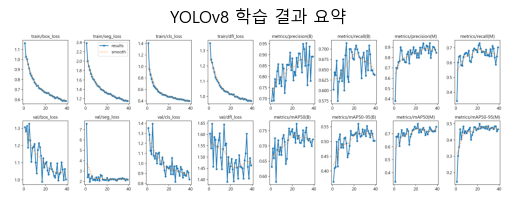

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib

# 한글 폰트 설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # Windows는 맑은 고딕
# matplotlib.rcParams['font.family'] = 'AppleGothic'  # macOS일 경우

# 마이너스 부호 깨짐 방지
matplotlib.rcParams['axes.unicode_minus'] = False

img = Image.open("runs/firesmoke_seg_tuned1/results.png")
plt.imshow(img)
plt.axis("off")
plt.title("YOLOv8 학습 결과 요약")
plt.show()


### detect s

In [1]:
from ultralytics import YOLO

# 모델 로드
model = YOLO("yolov8s.pt")

# 학습 시작
model.train(
    data="FireSmokeDetection-4/data.yaml",
    epochs=150,
    imgsz=768,
    batch=16,
    lr0=0.0007,
    optimizer="AdamW",
    dropout=0.1,
    weight_decay=0.0005,
    warmup_epochs=5,
    patience=20,
    device=0,
    project="runs",
    name="firesmoke_yolov8s_tuned",
)


New https://pypi.org/project/ultralytics/8.3.153 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.146  Python-3.12.9 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3070 Ti Laptop GPU, 8192MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=FireSmokeDetection-4/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.1, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=768, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0007, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=firesmoke_yolov8s_tuned2

train: Scanning C:\Users\main\workspace\vision\project\FireSmokeDetection-4\train\labels.cache... 4758 images, 23 backgrounds, 0 corrupt: 100%|██████████| 4758/4758 [00:00<?, ?it/s]

WARNING Box and segment counts should be equal, but got len(segments) = 1, len(boxes) = 9582. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


val: Fast image access  (ping: 0.10.1 ms, read: 445.5260.5 MB/s, size: 44.1 KB)


val: Scanning C:\Users\main\workspace\vision\project\FireSmokeDetection-4\valid\labels.cache... 1087 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1087/1087 [00:00<?, ?it/s]


Plotting labels to runs\firesmoke_yolov8s_tuned2\labels.jpg... 
optimizer: AdamW(lr=0.0007, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 768 train, 768 val
Using 8 dataloader workers
Logging results to runs\firesmoke_yolov8s_tuned2
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150       5.1G      1.894      2.329      1.885         23        768: 100%|██████████| 298/298 [01:08<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.37it/s]

                   all       1087       1937      0.222      0.183      0.161      0.068



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      5.01G      1.806      1.881        1.8         12        768: 100%|██████████| 298/298 [01:06<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.28it/s]

                   all       1087       1937      0.765       0.17      0.194     0.0801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      4.99G      1.812      1.873      1.806         25        768: 100%|██████████| 298/298 [01:05<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08<00:00,  4.09it/s]

                   all       1087       1937      0.457      0.233      0.243     0.0992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      4.98G      1.786      1.804      1.785         14        768: 100%|██████████| 298/298 [01:06<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.35it/s]

                   all       1087       1937      0.317      0.253      0.214     0.0945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150       5.2G      1.738      1.728      1.754         16        768: 100%|██████████| 298/298 [01:06<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08<00:00,  4.24it/s]

                   all       1087       1937      0.386      0.232       0.23      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      5.02G      1.737      1.686       1.74         24        768: 100%|██████████| 298/298 [01:05<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.32it/s]

                   all       1087       1937      0.364       0.32      0.282      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      5.19G      1.701      1.627      1.696         12        768: 100%|██████████| 298/298 [01:06<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08<00:00,  4.00it/s]

                   all       1087       1937       0.49      0.335      0.318      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      4.95G      1.685      1.598      1.681         15        768: 100%|██████████| 298/298 [01:05<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.29it/s]

                   all       1087       1937      0.454      0.329      0.328      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      5.17G      1.667      1.537      1.659         18        768: 100%|██████████| 298/298 [01:05<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.42it/s]

                   all       1087       1937      0.456      0.316      0.311      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      5.01G      1.638      1.494      1.635         27        768: 100%|██████████| 298/298 [01:05<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.46it/s]

                   all       1087       1937      0.446      0.307      0.295      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      4.92G      1.624      1.476      1.626         25        768: 100%|██████████| 298/298 [01:05<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.39it/s]

                   all       1087       1937      0.353      0.329       0.28      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      4.95G      1.587      1.424      1.607         21        768: 100%|██████████| 298/298 [01:05<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.40it/s]

                   all       1087       1937      0.444      0.299       0.31      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      5.17G      1.573      1.395      1.596         29        768: 100%|██████████| 298/298 [01:05<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.45it/s]

                   all       1087       1937      0.468      0.332      0.338      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      5.04G      1.563      1.376      1.582         15        768: 100%|██████████| 298/298 [01:05<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.45it/s]

                   all       1087       1937      0.476      0.339      0.334      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      4.99G      1.553      1.369      1.585         18        768: 100%|██████████| 298/298 [01:05<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.48it/s]

                   all       1087       1937      0.468      0.315       0.33      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      5.02G      1.561      1.353      1.582         11        768: 100%|██████████| 298/298 [01:05<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.47it/s]

                   all       1087       1937      0.548      0.287       0.31      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      4.95G      1.522      1.292      1.543         27        768: 100%|██████████| 298/298 [01:04<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.47it/s]

                   all       1087       1937      0.528      0.368      0.397      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      4.94G      1.518      1.272      1.531         15        768: 100%|██████████| 298/298 [01:05<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.48it/s]

                   all       1087       1937      0.441      0.359      0.343      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      5.02G      1.517      1.261      1.542         19        768: 100%|██████████| 298/298 [01:05<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.45it/s]

                   all       1087       1937      0.456      0.361      0.346      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      5.06G      1.483      1.225      1.504         12        768: 100%|██████████| 298/298 [01:05<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.46it/s]

                   all       1087       1937       0.49      0.377      0.364       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      5.23G      1.487       1.25      1.528         20        768: 100%|██████████| 298/298 [01:05<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.42it/s]

                   all       1087       1937      0.529      0.349      0.362      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      4.98G       1.47      1.199      1.501         12        768: 100%|██████████| 298/298 [01:05<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.42it/s]

                   all       1087       1937      0.486      0.327      0.347      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      4.99G      1.469      1.182        1.5         18        768: 100%|██████████| 298/298 [01:05<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.40it/s]

                   all       1087       1937      0.427      0.341      0.334      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      5.04G      1.438      1.172      1.479         23        768: 100%|██████████| 298/298 [01:05<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.32it/s]

                   all       1087       1937      0.466      0.358      0.343      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      5.17G      1.428      1.143      1.473         19        768: 100%|██████████| 298/298 [01:05<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.37it/s]

                   all       1087       1937      0.461      0.372      0.347      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      5.01G      1.427      1.138      1.473         14        768: 100%|██████████| 298/298 [01:05<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.48it/s]

                   all       1087       1937      0.532      0.365      0.377      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      4.95G      1.424      1.113      1.459         30        768: 100%|██████████| 298/298 [01:05<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.40it/s]

                   all       1087       1937      0.546      0.379      0.393      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      5.01G      1.389      1.082      1.439         22        768: 100%|██████████| 298/298 [01:05<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.38it/s]

                   all       1087       1937       0.44      0.363       0.35      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      4.92G      1.379      1.075      1.435         22        768: 100%|██████████| 298/298 [01:05<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.47it/s]

                   all       1087       1937      0.454      0.387      0.339      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      4.98G      1.373       1.05      1.425         31        768: 100%|██████████| 298/298 [01:05<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.47it/s]

                   all       1087       1937      0.492      0.354      0.363       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      4.95G      1.388      1.067      1.426         10        768: 100%|██████████| 298/298 [01:05<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.50it/s]

                   all       1087       1937       0.55      0.379       0.39      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      4.97G      1.375      1.051      1.423         24        768: 100%|██████████| 298/298 [01:05<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.48it/s]

                   all       1087       1937      0.511       0.35      0.372      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      5.19G      1.357      1.028      1.417         17        768: 100%|██████████| 298/298 [01:05<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.50it/s]

                   all       1087       1937      0.455       0.37      0.365      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      4.98G      1.341      1.006      1.407         19        768: 100%|██████████| 298/298 [01:06<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.35it/s]

                   all       1087       1937      0.483      0.364       0.36      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      4.95G      1.334      1.003      1.394         26        768: 100%|██████████| 298/298 [01:05<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.50it/s]

                   all       1087       1937      0.464      0.402      0.395       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150         5G      1.332     0.9833      1.387         23        768: 100%|██████████| 298/298 [01:05<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.48it/s]

                   all       1087       1937      0.491      0.373      0.364      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      4.98G      1.304       0.96      1.375         22        768: 100%|██████████| 298/298 [01:05<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.46it/s]

                   all       1087       1937      0.477      0.392      0.377      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      5.01G      1.303     0.9558      1.373          7        768: 100%|██████████| 298/298 [01:05<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.47it/s]

                   all       1087       1937      0.575      0.373      0.384       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      4.95G      1.284     0.9442       1.36         10        768: 100%|██████████| 298/298 [01:20<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.39it/s]

                   all       1087       1937      0.486      0.361      0.363      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      5.01G      1.295      0.932      1.365         19        768: 100%|██████████| 298/298 [01:05<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.39it/s]

                   all       1087       1937      0.477      0.378      0.387      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      4.95G      1.283     0.9155      1.354         26        768: 100%|██████████| 298/298 [01:05<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.37it/s]

                   all       1087       1937      0.457      0.374       0.37      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      4.98G      1.263      0.903      1.341         16        768: 100%|██████████| 298/298 [01:06<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.48it/s]

                   all       1087       1937      0.416      0.358      0.346      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      4.98G      1.254     0.8871      1.332         28        768: 100%|██████████| 298/298 [01:05<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.27it/s]

                   all       1087       1937      0.502       0.35      0.375      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      4.98G      1.255     0.8926      1.328         11        768: 100%|██████████| 298/298 [01:06<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08<00:00,  4.13it/s]

                   all       1087       1937      0.492      0.398       0.39      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      5.16G      1.233     0.8731      1.323         20        768: 100%|██████████| 298/298 [01:05<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.55it/s]

                   all       1087       1937      0.552      0.356      0.382      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      5.04G      1.238     0.8677      1.325         21        768: 100%|██████████| 298/298 [01:05<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.53it/s]

                   all       1087       1937      0.513      0.383      0.391      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      4.98G      1.225     0.8589       1.31         33        768: 100%|██████████| 298/298 [01:05<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.50it/s]

                   all       1087       1937      0.567      0.356      0.374      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      5.03G      1.208     0.8355      1.303         27        768: 100%|██████████| 298/298 [01:05<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.37it/s]

                   all       1087       1937      0.538      0.388      0.392      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      4.98G      1.205     0.8259      1.293         10        768: 100%|██████████| 298/298 [01:05<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.50it/s]

                   all       1087       1937      0.583      0.384      0.409      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      5.01G      1.202     0.8198      1.292         25        768: 100%|██████████| 298/298 [01:05<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.51it/s]

                   all       1087       1937      0.531      0.397      0.403      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      4.98G      1.204     0.8204      1.296         28        768: 100%|██████████| 298/298 [01:05<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.53it/s]

                   all       1087       1937      0.555      0.405      0.414      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      5.04G      1.183     0.8164      1.278         37        768: 100%|██████████| 298/298 [01:05<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.53it/s]

                   all       1087       1937      0.497      0.366      0.372      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      4.98G      1.171     0.7912      1.269         20        768: 100%|██████████| 298/298 [01:05<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.53it/s]

                   all       1087       1937      0.556      0.404      0.411      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150         5G      1.175      0.797      1.271         14        768: 100%|██████████| 298/298 [01:05<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.41it/s]

                   all       1087       1937      0.533       0.36      0.385      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      4.95G      1.156     0.7761      1.264         26        768: 100%|██████████| 298/298 [01:05<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.52it/s]

                   all       1087       1937       0.57      0.403      0.412      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      4.97G      1.154       0.78      1.262         24        768: 100%|██████████| 298/298 [01:05<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.50it/s]

                   all       1087       1937      0.534      0.393       0.39      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      4.95G      1.139     0.7735      1.255         22        768: 100%|██████████| 298/298 [01:05<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.51it/s]

                   all       1087       1937      0.546      0.366      0.376      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      4.98G      1.141     0.7518      1.252         14        768: 100%|██████████| 298/298 [01:05<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.50it/s]

                   all       1087       1937      0.511        0.4      0.402      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      4.95G      1.128     0.7407      1.235         27        768: 100%|██████████| 298/298 [01:05<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.52it/s]

                   all       1087       1937      0.581      0.388      0.414      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150         5G      1.125     0.7471      1.238         24        768: 100%|██████████| 298/298 [01:05<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08<00:00,  4.09it/s]

                   all       1087       1937      0.553      0.392      0.401      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      4.95G       1.11     0.7368      1.234         20        768: 100%|██████████| 298/298 [01:05<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.50it/s]

                   all       1087       1937      0.518      0.387      0.395      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      4.97G        1.1     0.7242      1.221         37        768: 100%|██████████| 298/298 [01:05<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.52it/s]

                   all       1087       1937      0.593       0.39      0.407      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      4.98G      1.111     0.7282      1.228         26        768: 100%|██████████| 298/298 [01:05<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.52it/s]

                   all       1087       1937      0.618      0.386      0.406      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      4.94G      1.095     0.7168      1.216         22        768: 100%|██████████| 298/298 [01:05<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.49it/s]

                   all       1087       1937      0.592      0.379      0.411       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      5.01G      1.084     0.7164      1.226         17        768: 100%|██████████| 298/298 [01:05<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.50it/s]

                   all       1087       1937      0.606      0.376      0.402      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      5.01G      1.094     0.7087      1.214         20        768: 100%|██████████| 298/298 [01:05<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.50it/s]

                   all       1087       1937      0.534      0.397      0.401      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      4.95G      1.082     0.6996      1.208         14        768: 100%|██████████| 298/298 [01:05<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.33it/s]

                   all       1087       1937      0.558      0.409      0.413      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      4.98G      1.069     0.6951      1.208         11        768: 100%|██████████| 298/298 [01:06<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.34it/s]

                   all       1087       1937      0.626      0.366      0.413      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      4.95G      1.071     0.6901      1.201         12        768: 100%|██████████| 298/298 [01:06<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.38it/s]

                   all       1087       1937      0.594      0.396      0.411      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      5.04G      1.062     0.6871        1.2         16        768: 100%|██████████| 298/298 [01:05<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.36it/s]

                   all       1087       1937      0.641      0.394      0.415      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      5.16G      1.054     0.6782      1.195         14        768: 100%|██████████| 298/298 [01:05<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.38it/s]

                   all       1087       1937      0.614      0.389      0.407       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      5.04G      1.044     0.6724      1.193         20        768: 100%|██████████| 298/298 [01:05<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.33it/s]

                   all       1087       1937      0.579      0.405      0.411      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      5.13G      1.038     0.6755      1.184         10        768: 100%|██████████| 298/298 [01:05<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.38it/s]

                   all       1087       1937      0.611      0.407      0.426      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150         5G      1.029     0.6628      1.178         16        768: 100%|██████████| 298/298 [01:06<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.35it/s]

                   all       1087       1937      0.649      0.371      0.416      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      4.98G      1.032     0.6597      1.181         16        768: 100%|██████████| 298/298 [01:05<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.37it/s]

                   all       1087       1937       0.54       0.42      0.419      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      5.01G      1.015     0.6453      1.168         31        768: 100%|██████████| 298/298 [01:05<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.39it/s]

                   all       1087       1937      0.578      0.396      0.408      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      4.98G      1.017     0.6358      1.163         23        768: 100%|██████████| 298/298 [01:05<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.39it/s]

                   all       1087       1937      0.581      0.392      0.411      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      5.01G      1.012     0.6377      1.163         21        768: 100%|██████████| 298/298 [01:05<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.38it/s]

                   all       1087       1937      0.583      0.412      0.413       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      4.98G      1.011     0.6413      1.164         19        768: 100%|██████████| 298/298 [01:05<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.51it/s]

                   all       1087       1937      0.606      0.404      0.422      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      4.98G     0.9899     0.6261       1.15         18        768: 100%|██████████| 298/298 [01:05<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.53it/s]

                   all       1087       1937      0.605      0.404      0.421       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      5.12G     0.9883     0.6227      1.151         33        768: 100%|██████████| 298/298 [01:05<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.50it/s]

                   all       1087       1937      0.578      0.405      0.421      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      4.98G     0.9799     0.6205      1.153          8        768: 100%|██████████| 298/298 [01:05<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.50it/s]

                   all       1087       1937      0.609      0.382      0.408      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      5.16G     0.9821     0.6231      1.149         17        768: 100%|██████████| 298/298 [01:05<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.47it/s]

                   all       1087       1937      0.601      0.395      0.419       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      4.98G     0.9895     0.6233      1.148         13        768: 100%|██████████| 298/298 [01:05<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.44it/s]

                   all       1087       1937      0.552      0.399      0.411      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      4.98G     0.9726     0.6001      1.141         25        768: 100%|██████████| 298/298 [01:05<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.46it/s]

                   all       1087       1937      0.555       0.39      0.406      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      4.98G     0.9577     0.5987      1.135         16        768: 100%|██████████| 298/298 [01:05<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.39it/s]

                   all       1087       1937      0.572      0.389      0.388      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150       5.2G     0.9641     0.6019      1.132         11        768: 100%|██████████| 298/298 [01:05<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.50it/s]

                   all       1087       1937      0.482      0.394      0.379      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      4.98G     0.9494     0.5967      1.126          7        768: 100%|██████████| 298/298 [01:05<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.49it/s]

                   all       1087       1937      0.536      0.397      0.398      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      4.95G     0.9429     0.5921      1.126         14        768: 100%|██████████| 298/298 [01:05<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.48it/s]

                   all       1087       1937      0.578      0.378      0.398      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      5.03G     0.9508       0.59      1.128         17        768: 100%|██████████| 298/298 [01:05<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08<00:00,  4.09it/s]

                   all       1087       1937        0.6      0.393      0.418       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      5.02G     0.9401       0.58      1.123         24        768: 100%|██████████| 298/298 [01:06<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08<00:00,  4.23it/s]

                   all       1087       1937      0.583      0.387      0.415      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      4.97G     0.9398     0.5824      1.116         27        768: 100%|██████████| 298/298 [01:07<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08<00:00,  3.86it/s]

                   all       1087       1937      0.566      0.407      0.417      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      5.01G     0.9405     0.5785      1.119         18        768: 100%|██████████| 298/298 [01:08<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.29it/s]

                   all       1087       1937      0.551      0.391      0.407      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      4.97G      0.928     0.5723      1.115         17        768: 100%|██████████| 298/298 [01:06<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.29it/s]

                   all       1087       1937      0.582      0.386      0.411       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      4.98G     0.9254     0.5661      1.114         25        768: 100%|██████████| 298/298 [01:06<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.42it/s]

                   all       1087       1937      0.562       0.41      0.414      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      4.98G     0.9181      0.563      1.108         27        768: 100%|██████████| 298/298 [01:05<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.39it/s]

                   all       1087       1937      0.599      0.389      0.412       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      4.98G     0.9092     0.5574      1.103         17        768: 100%|██████████| 298/298 [01:05<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.37it/s]

                   all       1087       1937       0.61      0.393      0.418      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      5.01G     0.9024     0.5476      1.101         20        768: 100%|██████████| 298/298 [01:05<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.42it/s]

                   all       1087       1937      0.578      0.383      0.406      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      5.16G     0.8983     0.5543      1.096         20        768: 100%|██████████| 298/298 [01:05<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.42it/s]

                   all       1087       1937      0.577      0.403      0.405       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      5.03G     0.8911     0.5446      1.096         27        768: 100%|██████████| 298/298 [01:06<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.28it/s]

                   all       1087       1937      0.628       0.37      0.407      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      4.98G     0.8972     0.5424      1.091         31        768: 100%|██████████| 298/298 [01:06<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.38it/s]

                   all       1087       1937      0.568      0.397      0.411      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      4.98G       0.88     0.5338      1.088         23        768: 100%|██████████| 298/298 [01:06<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.34it/s]

                   all       1087       1937      0.626      0.382      0.418      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      5.02G     0.8837     0.5405      1.091         25        768: 100%|██████████| 298/298 [01:06<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.26it/s]

                   all       1087       1937      0.608      0.396      0.416      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150         5G      0.872     0.5301      1.083         32        768: 100%|██████████| 298/298 [01:06<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08<00:00,  4.04it/s]

                   all       1087       1937      0.587      0.398       0.41      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      5.01G     0.8708     0.5312      1.079         12        768: 100%|██████████| 298/298 [01:05<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.38it/s]

                   all       1087       1937      0.602      0.396      0.412      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      5.04G     0.8608      0.522      1.075         14        768: 100%|██████████| 298/298 [01:06<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.38it/s]

                   all       1087       1937      0.574      0.403      0.412      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      5.19G     0.8664     0.5226       1.08         26        768: 100%|██████████| 298/298 [01:06<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08<00:00,  4.24it/s]

                   all       1087       1937      0.636      0.386      0.414      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      4.98G     0.8634     0.5242       1.08         17        768: 100%|██████████| 298/298 [01:07<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.27it/s]

                   all       1087       1937      0.596      0.396      0.412      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      4.95G     0.8546      0.519      1.082         29        768: 100%|██████████| 298/298 [01:08<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.33it/s]

                   all       1087       1937      0.547      0.411      0.409      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      4.98G     0.8528     0.5165      1.069         20        768: 100%|██████████| 298/298 [01:07<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08<00:00,  3.83it/s]

                   all       1087       1937       0.59      0.404      0.413      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      5.01G     0.8462     0.5163      1.069         15        768: 100%|██████████| 298/298 [01:07<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.51it/s]

                   all       1087       1937      0.641      0.383       0.41      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      5.04G     0.8397     0.5131      1.068         18        768: 100%|██████████| 298/298 [01:05<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.38it/s]

                   all       1087       1937      0.631       0.39      0.415      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      5.02G     0.8345     0.4969      1.057         19        768: 100%|██████████| 298/298 [01:05<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.40it/s]

                   all       1087       1937      0.601      0.402      0.412      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      5.01G       0.84     0.5034      1.069         36        768: 100%|██████████| 298/298 [01:06<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.33it/s]

                   all       1087       1937      0.629      0.392      0.415      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      5.19G     0.8273     0.4947      1.062         21        768: 100%|██████████| 298/298 [01:06<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.36it/s]

                   all       1087       1937       0.61      0.389      0.413      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150         5G     0.8211     0.4941      1.059         26        768: 100%|██████████| 298/298 [01:06<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08<00:00,  4.01it/s]

                   all       1087       1937      0.602      0.397      0.411      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150       5.2G     0.8274     0.4937      1.057         21        768: 100%|██████████| 298/298 [01:06<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08<00:00,  4.04it/s]

                   all       1087       1937      0.627      0.388      0.408      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      5.03G     0.8119      0.484      1.054         21        768: 100%|██████████| 298/298 [01:06<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.34it/s]

                   all       1087       1937      0.632      0.391      0.412      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      5.16G     0.8091     0.4874       1.05         21        768: 100%|██████████| 298/298 [01:06<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.36it/s]

                   all       1087       1937      0.599      0.399      0.414      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      4.98G      0.818     0.4872      1.055         14        768: 100%|██████████| 298/298 [01:05<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.35it/s]

                   all       1087       1937       0.66      0.384      0.411      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      4.98G     0.8093     0.4904      1.054         17        768: 100%|██████████| 298/298 [01:05<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.32it/s]

                   all       1087       1937      0.598      0.402       0.41      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      4.98G     0.7913     0.4763      1.049         30        768: 100%|██████████| 298/298 [01:05<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.37it/s]

                   all       1087       1937      0.639       0.39      0.409      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      4.98G     0.7989     0.4775      1.049         11        768: 100%|██████████| 298/298 [01:05<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.39it/s]

                   all       1087       1937      0.621      0.389      0.411      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      4.98G      0.793     0.4784      1.045         12        768: 100%|██████████| 298/298 [01:05<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.38it/s]

                   all       1087       1937      0.607        0.4      0.414      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      4.95G     0.7915     0.4711      1.042         14        768: 100%|██████████| 298/298 [01:05<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.38it/s]

                   all       1087       1937      0.623       0.39      0.413      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      4.97G     0.7818      0.471      1.038         24        768: 100%|██████████| 298/298 [01:05<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.40it/s]

                   all       1087       1937      0.591        0.4      0.412      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      5.01G     0.7887     0.4731      1.043          8        768: 100%|██████████| 298/298 [06:17<00:00,  1.27s/it]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.65it/s]

                   all       1087       1937      0.627       0.39      0.411      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      4.94G     0.7822     0.4643      1.039         18        768: 100%|██████████| 298/298 [01:03<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.61it/s]

                   all       1087       1937      0.621      0.397      0.411      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      5.16G     0.7786     0.4631      1.031         30        768: 100%|██████████| 298/298 [01:04<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.56it/s]

                   all       1087       1937      0.669      0.384      0.411      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      4.98G     0.7738     0.4615      1.034         19        768: 100%|██████████| 298/298 [01:04<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.54it/s]

                   all       1087       1937      0.635      0.392      0.407      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      5.01G     0.7731     0.4655      1.036          6        768: 100%|██████████| 298/298 [01:05<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.42it/s]

                   all       1087       1937      0.641      0.386      0.407      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150         5G     0.7667     0.4699      1.033         31        768: 100%|██████████| 298/298 [01:05<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.43it/s]

                   all       1087       1937      0.622      0.392      0.406      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      4.95G     0.7591     0.4472      1.028         23        768: 100%|██████████| 298/298 [01:05<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.42it/s]

                   all       1087       1937      0.657      0.381       0.41      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150         5G     0.7533     0.4451      1.022         20        768: 100%|██████████| 298/298 [01:05<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.43it/s]

                   all       1087       1937      0.573      0.411      0.414      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      4.98G     0.7553     0.4478      1.026         30        768: 100%|██████████| 298/298 [01:05<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.39it/s]

                   all       1087       1937       0.58      0.411      0.415      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150         5G     0.7532     0.4477      1.024         14        768: 100%|██████████| 298/298 [01:05<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.44it/s]

                   all       1087       1937      0.622      0.394      0.414      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      4.95G     0.7552     0.4474      1.023         13        768: 100%|██████████| 298/298 [01:05<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.43it/s]

                   all       1087       1937      0.596      0.401      0.413      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      4.97G     0.7469     0.4407      1.023         14        768: 100%|██████████| 298/298 [01:05<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.43it/s]

                   all       1087       1937      0.578      0.407      0.412      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      4.91G     0.7509     0.4428      1.021         15        768: 100%|██████████| 298/298 [01:05<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.43it/s]

                   all       1087       1937       0.59      0.404      0.411      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      5.01G     0.7422     0.4451       1.02         17        768: 100%|██████████| 298/298 [01:05<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.40it/s]

                   all       1087       1937      0.585      0.411      0.413      0.228


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      5.16G     0.6912     0.3641     0.9872          8        768: 100%|██████████| 298/298 [01:05<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.44it/s]

                   all       1087       1937      0.586      0.406      0.413      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      4.97G     0.6709     0.3511     0.9779         11        768: 100%|██████████| 298/298 [01:05<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.43it/s]

                   all       1087       1937      0.605      0.397      0.415       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      4.95G     0.6597     0.3459      0.969          6        768: 100%|██████████| 298/298 [49:42<00:00, 10.01s/it]    
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.52it/s]

                   all       1087       1937      0.589      0.404      0.415       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      4.98G     0.6581     0.3434     0.9686         17        768: 100%|██████████| 298/298 [01:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.62it/s]

                   all       1087       1937      0.588      0.404      0.418       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      5.16G     0.6513     0.3405     0.9623         12        768: 100%|██████████| 298/298 [01:03<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.59it/s]

                   all       1087       1937      0.572      0.414      0.419      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      4.98G     0.6468      0.336     0.9634         15        768: 100%|██████████| 298/298 [01:05<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.58it/s]

                   all       1087       1937      0.597      0.403      0.422      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      4.95G     0.6484     0.3391     0.9673         12        768: 100%|██████████| 298/298 [01:04<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.56it/s]

                   all       1087       1937      0.617      0.398      0.423      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      4.97G     0.6363     0.3309     0.9533          9        768: 100%|██████████| 298/298 [01:04<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.55it/s]

                   all       1087       1937      0.589      0.407      0.423      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      4.95G     0.6353      0.327     0.9545          6        768: 100%|██████████| 298/298 [01:05<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.57it/s]

                   all       1087       1937      0.592      0.405      0.424      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      4.97G      0.631     0.3311     0.9573          7        768: 100%|██████████| 298/298 [01:04<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.41it/s]

                   all       1087       1937      0.586      0.408      0.424      0.235



150 epochs completed in 3.988 hours.
Optimizer stripped from runs\firesmoke_yolov8s_tuned2\weights\last.pt, 22.6MB
Optimizer stripped from runs\firesmoke_yolov8s_tuned2\weights\best.pt, 22.6MB

Validating runs\firesmoke_yolov8s_tuned2\weights\best.pt...
Ultralytics 8.3.146  Python-3.12.9 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3070 Ti Laptop GPU, 8192MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08<00:00,  4.16it/s]


                   all       1087       1937      0.586      0.406      0.424      0.235
                  fire        528       1123      0.656      0.619      0.633      0.387
                 smoke        728        814      0.516      0.194      0.215     0.0836
Speed: 0.3ms preprocess, 3.8ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs\firesmoke_yolov8s_tuned2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001D54B2C53D0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib

# 한글 폰트 설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # Windows는 맑은 고딕
# matplotlib.rcParams['font.family'] = 'AppleGothic'  # macOS일 경우

# 마이너스 부호 깨짐 방지
matplotlib.rcParams['axes.unicode_minus'] = False

img = Image.open("runs/firesmoke_yolov8s_tuned2/results.png")
plt.imshow(img)
plt.axis("off")
plt.title("YOLOv8 학습 결과 요약")
plt.show()


seg 튜닝

In [1]:
from ultralytics import YOLO

# 1. 모델 로드
model = YOLO("yolov8n-seg.pt")

# 2. 학습 시작
model.train(
    data="Fire-and-Smoke-Segmentation-6/data.yaml",
    epochs=150,
    patience=20,
    imgsz=640,  # Seg는 640이 가장 안정
    batch=16,
    lr0=0.002,  # 기본보다 약간 증가
    optimizer='SGD',  # 검증된 optimizer
    momentum=0.937,
    weight_decay=0.0001,  # 약하게만 적용
    warmup_epochs=2,
    warmup_momentum=0.8,
    degrees=0.0,  # 회전/왜곡 비활성화
    translate=0.05,
    scale=0.5,
    shear=0.0,
    perspective=0.0,
    flipud=0.0,
    fliplr=0.5,
    mosaic=1.0,  # 데이터 다양성 확보
    mixup=0.1,
    hsv_h=0.015, hsv_s=0.7, hsv_v=0.4,
    device=0,
    project="runs",
    name="firesmoke_seg_optimal",
    resume=False
)


New https://pypi.org/project/ultralytics/8.3.154 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.146  Python-3.12.9 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3070 Ti Laptop GPU, 8192MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Fire-and-Smoke-Segmentation-6/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.002, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolov8n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=firesmoke_se

train: Scanning C:\Users\main\workspace\vision\project\Fire-and-Smoke-Segmentation-6\train\labels.cache... 7050 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7050/7050 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.50.3 ms, read: 48.235.9 MB/s, size: 37.8 KB)


val: Scanning C:\Users\main\workspace\vision\project\Fire-and-Smoke-Segmentation-6\valid\labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]


Plotting labels to runs\firesmoke_seg_optimal\labels.jpg... 
optimizer: SGD(lr=0.002, momentum=0.937) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0001), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\firesmoke_seg_optimal
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/150      2.79G      1.267      2.864      2.493       1.38         42        640: 100%|██████████| 441/441 [01:21<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]

                   all         40         97      0.741      0.585      0.637      0.444      0.766      0.597      0.645      0.407



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/150      3.36G      1.072      2.269      1.389      1.223         60        640: 100%|██████████| 441/441 [01:10<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.43it/s]

                   all         40         97      0.837      0.689       0.72      0.537      0.863      0.704      0.763      0.468



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/150      3.37G     0.9925      2.091      1.133      1.172         52        640: 100%|██████████| 441/441 [01:10<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.94it/s]

                   all         40         97      0.708      0.704      0.712      0.514      0.717      0.713      0.724      0.464



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/150      3.37G     0.9282      1.948      1.001      1.133         33        640: 100%|██████████| 441/441 [01:10<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.98it/s]

                   all         40         97      0.861      0.692      0.751      0.569      0.889      0.713      0.778      0.505



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/150      3.37G       0.89      1.869     0.9145      1.103         49        640: 100%|██████████| 441/441 [01:21<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.70it/s]

                   all         40         97      0.856      0.689      0.777      0.544      0.851      0.685      0.784      0.502



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/150      3.39G     0.8566      1.808     0.8538      1.086         38        640: 100%|██████████| 441/441 [01:22<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.51it/s]

                   all         40         97      0.903      0.677      0.784      0.545      0.914      0.685       0.78      0.494



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/150      3.39G     0.8342      1.779     0.8125      1.074         59        640: 100%|██████████| 441/441 [01:09<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.37it/s]

                   all         40         97       0.81       0.73      0.764      0.548      0.801      0.722      0.754      0.496



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/150      3.39G     0.8156      1.735      0.772      1.062         46        640: 100%|██████████| 441/441 [01:10<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.35it/s]

                   all         40         97      0.801      0.739      0.773      0.518      0.871      0.664      0.734       0.48



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/150      3.39G     0.8034      1.719     0.7577       1.06         60        640: 100%|██████████| 441/441 [01:10<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.49it/s]

                   all         40         97      0.845      0.707       0.75      0.534      0.854      0.716      0.746      0.491



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/150      3.39G     0.7872      1.686     0.7301      1.048         70        640: 100%|██████████| 441/441 [01:09<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.93it/s]

                   all         40         97      0.912      0.727      0.763      0.575      0.884       0.71       0.76      0.507



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/150      3.39G     0.7683      1.641     0.7036       1.04         58        640: 100%|██████████| 441/441 [01:09<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.28it/s]

                   all         40         97       0.87      0.703      0.773      0.546      0.888      0.682      0.761      0.501



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/150      3.39G     0.7557      1.626     0.6798       1.03         51        640: 100%|██████████| 441/441 [01:09<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.86it/s]

                   all         40         97      0.957      0.651      0.761      0.567      0.968      0.659      0.754      0.485



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/150      3.39G     0.7446      1.598     0.6597      1.022         33        640: 100%|██████████| 441/441 [01:12<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.20it/s]

                   all         40         97      0.819      0.754       0.77      0.521       0.87       0.67      0.745       0.49



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/150      3.39G     0.7441      1.598     0.6554      1.029         69        640: 100%|██████████| 441/441 [01:24<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.90it/s]

                   all         40         97      0.895      0.644      0.709      0.532      0.903      0.673      0.735      0.472



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/150      3.39G     0.7263      1.568     0.6399      1.019         28        640: 100%|██████████| 441/441 [01:13<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.17it/s]

                   all         40         97      0.861      0.753      0.764      0.559      0.844      0.723      0.767      0.482



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/150      3.39G     0.7166      1.541     0.6198      1.012         50        640: 100%|██████████| 441/441 [01:26<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.25it/s]

                   all         40         97      0.833      0.702      0.751      0.552       0.81      0.686      0.725      0.487



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/150      3.39G     0.7082      1.526      0.613       1.01         49        640: 100%|██████████| 441/441 [01:11<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.40it/s]

                   all         40         97      0.868      0.686      0.743      0.531      0.857      0.682      0.727      0.472



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/150      3.39G     0.7024      1.517     0.6022      1.004         42        640: 100%|██████████| 441/441 [01:12<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.15it/s]

                   all         40         97      0.802      0.756      0.772      0.557      0.856        0.7      0.747      0.489



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/150      3.39G     0.6999      1.513     0.5999      1.005         36        640: 100%|██████████| 441/441 [01:20<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.05it/s]

                   all         40         97      0.809      0.735      0.748      0.517      0.773      0.704       0.72      0.454



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/150      3.39G     0.6918        1.5     0.5891          1         53        640: 100%|██████████| 441/441 [01:15<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.70it/s]

                   all         40         97      0.912      0.679      0.768      0.544      0.899      0.665      0.751      0.499



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/150      3.39G     0.6916      1.505      0.588      1.005         62        640: 100%|██████████| 441/441 [01:10<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.71it/s]

                   all         40         97      0.907      0.695      0.766      0.549      0.878      0.678      0.748      0.491



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/150      3.39G     0.6923      1.487     0.5764     0.9986         66        640: 100%|██████████| 441/441 [01:10<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.39it/s]

                   all         40         97      0.876       0.74      0.799      0.551      0.804      0.796      0.789      0.483



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/150      3.39G     0.6781      1.467     0.5607     0.9937         55        640: 100%|██████████| 441/441 [01:12<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.70it/s]

                   all         40         97      0.838      0.744       0.77      0.554       0.86      0.738      0.763      0.494



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/150      3.39G     0.6705      1.459      0.558     0.9917         54        640: 100%|██████████| 441/441 [01:12<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.08it/s]

                   all         40         97      0.847      0.704       0.76      0.549       0.85      0.704       0.77      0.484



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/150      3.39G     0.6713      1.452     0.5582     0.9914         41        640: 100%|██████████| 441/441 [01:13<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.48it/s]

                   all         40         97      0.865      0.681      0.749      0.565      0.874       0.69      0.762      0.497



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/150      3.39G     0.6656      1.434     0.5467     0.9863         43        640: 100%|██████████| 441/441 [01:10<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.57it/s]

                   all         40         97      0.895      0.747      0.797      0.603      0.904      0.755      0.805       0.52



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/150      3.39G     0.6627      1.427      0.539     0.9875         48        640: 100%|██████████| 441/441 [01:09<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.92it/s]

                   all         40         97      0.871      0.692      0.752      0.543      0.852      0.679      0.724      0.468



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/150      3.39G     0.6531      1.414      0.533     0.9806         36        640: 100%|██████████| 441/441 [01:09<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.24it/s]

                   all         40         97      0.794      0.756      0.781      0.583      0.794      0.774      0.796      0.509



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/150      3.39G     0.6518      1.434     0.5324     0.9823         29        640: 100%|██████████| 441/441 [01:09<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.43it/s]

                   all         40         97       0.82      0.734      0.761      0.559      0.938      0.657      0.763      0.484



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/150      3.39G     0.6562      1.413       0.53     0.9816         62        640: 100%|██████████| 441/441 [01:12<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.21it/s]

                   all         40         97      0.917      0.685      0.778      0.562      0.927      0.694      0.778        0.5



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/150      3.39G     0.6434      1.392     0.5184     0.9773         38        640: 100%|██████████| 441/441 [01:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.02it/s]

                   all         40         97      0.873      0.714       0.75       0.55      0.961      0.672      0.769       0.48



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/150      3.39G     0.6392      1.376     0.5147     0.9755         42        640: 100%|██████████| 441/441 [01:10<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.73it/s]

                   all         40         97      0.872      0.711      0.765      0.553      0.882       0.72      0.783      0.497



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/150      3.39G     0.6337      1.371     0.5109     0.9723         41        640: 100%|██████████| 441/441 [01:09<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.12it/s]

                   all         40         97      0.813      0.717      0.777      0.566      0.936      0.684      0.783      0.506



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/150      3.39G     0.6372      1.378     0.5076     0.9744         43        640: 100%|██████████| 441/441 [01:12<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.55it/s]

                   all         40         97      0.932      0.696      0.756      0.565      0.862      0.717      0.765      0.484



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/150      3.39G     0.6316      1.367     0.5039     0.9705         40        640: 100%|██████████| 441/441 [01:10<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.36it/s]

                   all         40         97      0.846      0.724      0.779      0.591      0.864      0.741      0.798      0.531



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/150      3.39G     0.6333      1.372     0.5054      0.973         43        640: 100%|██████████| 441/441 [01:12<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.45it/s]

                   all         40         97      0.852      0.706      0.763      0.562      0.859      0.729      0.766      0.506



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/150      3.39G     0.6242      1.351     0.4945      0.967         32        640: 100%|██████████| 441/441 [01:08<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.98it/s]

                   all         40         97       0.88      0.707      0.776      0.576      0.895      0.716      0.771      0.505



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/150      3.39G     0.6218      1.348     0.4899      0.966         61        640: 100%|██████████| 441/441 [01:09<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.18it/s]

                   all         40         97      0.934      0.687      0.785      0.578      0.903       0.67      0.763      0.508



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/150      3.39G     0.6208      1.347      0.492      0.965         38        640: 100%|██████████| 441/441 [01:10<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.15it/s]

                   all         40         97      0.899      0.674      0.744      0.568      0.936      0.689      0.758      0.497



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/150      3.39G     0.6261      1.353     0.4941      0.971         45        640: 100%|██████████| 441/441 [01:10<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]

                   all         40         97      0.832      0.696      0.755      0.574      0.827      0.704      0.754      0.497



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/150      3.39G     0.6191      1.339      0.486     0.9658         40        640: 100%|██████████| 441/441 [01:08<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.55it/s]

                   all         40         97      0.901       0.69      0.759       0.57      0.857      0.674      0.745      0.491



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/150      3.39G     0.6113      1.317     0.4774     0.9625         48        640: 100%|██████████| 441/441 [01:10<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.72it/s]

                   all         40         97      0.944      0.642      0.752      0.559      0.854      0.662      0.736      0.499



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/150      3.39G     0.6175      1.306     0.4763      0.964         50        640: 100%|██████████| 441/441 [01:12<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.90it/s]

                   all         40         97      0.915      0.623      0.731      0.545      0.838      0.712      0.767      0.504



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/150      3.39G     0.6095      1.329     0.4761     0.9608         53        640: 100%|██████████| 441/441 [01:09<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.05it/s]

                   all         40         97      0.912      0.692      0.773      0.568       0.93      0.697      0.789      0.497



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/150      3.39G     0.6068      1.304     0.4723     0.9598         34        640: 100%|██████████| 441/441 [01:09<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.43it/s]

                   all         40         97      0.873      0.657      0.736       0.56      0.883      0.666      0.727      0.491



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/150      3.39G      0.611      1.322     0.4754     0.9636         39        640: 100%|██████████| 441/441 [01:09<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.97it/s]

                   all         40         97      0.873      0.688      0.781      0.589      0.909      0.696      0.785      0.516
EarlyStopping: Training stopped early as no improvement observed in last 20 epochs. Best results observed at epoch 26, best model saved as best.pt.
To update EarlyStopping(patience=20) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



46 epochs completed in 0.931 hours.
Optimizer stripped from runs\firesmoke_seg_optimal\weights\last.pt, 6.8MB
Optimizer stripped from runs\firesmoke_seg_optimal\weights\best.pt, 6.8MB

Validating runs\firesmoke_seg_optimal\weights\best.pt...
Ultralytics 8.3.146  Python-3.12.9 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3070 Ti Laptop GPU, 8192MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,258,454 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validati

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:00<00:00,  2.82it/s]

WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.11it/s]


                   all         40         97      0.862      0.748      0.795      0.603      0.902      0.756      0.806      0.519
                  fire         40         58      0.935      0.828      0.886      0.711      0.969      0.845      0.917       0.66
                 smoke         28         39      0.788      0.669      0.703      0.494      0.836      0.667      0.695      0.378
Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs\firesmoke_seg_optimal


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001E18E582750>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.0